# <center><font color='magenta'>**Assignment 1: Airbnb in Toronto**</font></center>
### <center>Enkhsaikhan Usny-Ekh</center>

Github: https://github.com/Enkhsaikhan-u/Building-prediction-model-on-Airbnb-listings

In [513]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
import numpy as np
import sys
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf
from stargazer.stargazer import Stargazer

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from statsmodels.tools.eval_measures import mse,rmse
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

### <span style="color:blue"><b>1. Data cleaning</b></span>

#### Data cleaning

In [514]:
data_q1 = pd.read_csv("https://raw.githubusercontent.com/Enkhsaikhan-u/Building-prediction-model-on-Airbnb-listings/refs/heads/main/listings_2024Q1.csv")

In [515]:
data_q1

,id,host_id,host_since,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_neighbourhood,host_listings_count,host_total_listings_count,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,1.419000e+03,1565,8/8/2008,NaN,NaN,NaN,f,Commercial Drive,1.0,1.0,...,5.00,5.00,5.00,NaN,f,1,1,0,0,0.06
1,8.077000e+03,22795,6/22/2009,NaN,NaN,NaN,f,Harbourfront,2.0,3.0,...,4.90,4.92,4.83,NaN,f,2,1,1,0,0.95
2,2.665400e+04,113345,4/25/2010,within a day,100%,40%,f,Entertainment District,6.0,10.0,...,4.76,4.86,4.67,NaN,f,5,5,0,0,0.26
3,2.742300e+04,118124,5/4/2010,within a few hours,100%,100%,f,Greenwood-Coxwell,1.0,1.0,...,5.00,4.85,4.85,NaN,f,1,1,0,0,0.17
4,3.093100e+04,22795,6/22/2009,NaN,NaN,NaN,f,Harbourfront,2.0,3.0,...,NaN,NaN,NaN,NaN,f,2,1,1,0,0.01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20761,1.110000e+18,563594851,2/23/2024,within an hour,100%,100%,f,Thornhill,2.0,3.0,...,NaN,NaN,NaN,NaN,t,2,2,0,0,NaN
20762,1.110000e+18,174078736,2/18/2018,within an hour,100%,100%,f,NaN,10.0,15.0,...,NaN,NaN,NaN,STR-2101-FZZBHD,t,1,1,0,0,NaN
20763,1.110000e+18,531821181,8/14/2023,NaN,NaN,NaN,f,NaN,1.0,1.0,...,NaN,NaN,NaN,NaN,t,1,1,0,0,NaN
20764,1.110000e+18,565752179,3/6/2024,NaN,NaN,NaN,f,NaN,1.0,1.0,...,NaN,NaN,NaN,NaN,f,1,1,0,0,NaN


In [516]:
data_q1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20766 entries, 0 to 20765
Data columns (total 60 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            20766 non-null  float64
 1   host_id                                       20766 non-null  int64  
 2   host_since                                    20764 non-null  object 
 3   host_response_time                            13956 non-null  object 
 4   host_response_rate                            13956 non-null  object 
 5   host_acceptance_rate                          15325 non-null  object 
 6   host_is_superhost                             20415 non-null  object 
 7   host_neighbourhood                            8455 non-null   object 
 8   host_listings_count                           20764 non-null  float64
 9   host_total_listings_count                     20764 non-null 

In [517]:
#Keeping variables
data_q1 = data_q1[["id", "host_id", "host_response_time", "host_acceptance_rate", "host_is_superhost", 
                   "host_total_listings_count", "latitude", "longitude", "property_type", "room_type", "accommodates",
                   "bathrooms_text", "bedrooms", "beds", "price", "minimum_nights", "maximum_nights", "number_of_reviews",
                   "review_scores_rating", "amenities", "neighbourhood", "neighbourhood_cleansed"]]

In [518]:
data_q1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20766 entries, 0 to 20765
Data columns (total 22 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   id                         20766 non-null  float64
 1   host_id                    20766 non-null  int64  
 2   host_response_time         13956 non-null  object 
 3   host_acceptance_rate       15325 non-null  object 
 4   host_is_superhost          20415 non-null  object 
 5   host_total_listings_count  20764 non-null  float64
 6   latitude                   20766 non-null  float64
 7   longitude                  20766 non-null  float64
 8   property_type              20766 non-null  object 
 9   room_type                  20766 non-null  object 
 10  accommodates               20766 non-null  int64  
 11  bathrooms_text             20760 non-null  object 
 12  bedrooms                   19140 non-null  float64
 13  beds                       15180 non-null  flo

In [519]:
#Converting price variable to float
data_q1["price"] = data_q1["price"].replace({'\$': '', ',': ''}, regex=True).astype(float)

In [520]:
#Converting bathroom variable to float
data_q1["bathroom"] = data_q1["bathrooms_text"].replace(r'[^\d.]', '', regex=True).replace('', np.nan).astype(float)

In [521]:
data_q1["host_acceptance_rate"] = data_q1["host_acceptance_rate"].str.replace("%", "").astype(float)

Host_response_time and Neighborhood have too many missing variables

In [522]:
#Number of missing values
data_q1.isnull().sum()

id                              0
host_id                         0
host_response_time           6810
host_acceptance_rate         5441
host_is_superhost             351
host_total_listings_count       2
latitude                        0
longitude                       0
property_type                   0
room_type                       0
accommodates                    0
bathrooms_text                  6
bedrooms                     1626
beds                         5586
price                        5576
minimum_nights                  0
maximum_nights                  0
number_of_reviews               0
review_scores_rating         5412
amenities                       0
neighbourhood                9472
neighbourhood_cleansed          0
bathroom                       55
dtype: int64

In [523]:
#Dropping missing values
data_q1 = data_q1.dropna(subset=["host_acceptance_rate", "host_is_superhost", "beds",
                                   "host_total_listings_count", "bedrooms", "price", "review_scores_rating", "bathroom"])

In [524]:
data_q1["property_type"].value_counts()

property_type
Entire rental unit                    2243
Private room in home                  2172
Entire condo                          1875
Entire home                           1732
Entire guest suite                     522
Private room in rental unit            443
Private room in condo                  249
Private room in bungalow               219
Private room in townhouse              187
Entire townhouse                       134
Private room in guest suite            128
Entire loft                            115
Entire bungalow                        102
Entire guesthouse                       70
Private room in villa                   34
Shared room in home                     22
Entire serviced apartment               20
Private room in bed and breakfast       19
Room in boutique hotel                  15
Shared room in rental unit              14
Room in hotel                           13
Private room                            11
Shared room in condo                    

In [525]:
data_q1.groupby('property_type')["price"].mean().sort_values()

property_type
Shared room in townhouse                30.200000
Shared room in bungalow                 32.000000
Private room in hut                     50.000000
Private room in tiny home               50.000000
Shared room in hostel                   55.888889
Shared room in home                     58.454545
Private room in villa                   58.823529
Shared room in hotel                    63.000000
Private room in bungalow                65.283105
Private room in casa particular         68.142857
Private room in serviced apartment      68.750000
Private room in barn                    72.600000
Private room in home                    75.518416
Shared room in rental unit              76.285714
Private room                            81.454545
Private room in townhouse               84.652406
Private room in guest suite             85.687500
Private room in bed and breakfast       86.526316
Private room in rental unit             88.040632
Shared room in condo                

In [526]:
data_q1["room_type"].value_counts()

room_type
Entire home/apt    6845
Private room       3534
Shared room          68
Name: count, dtype: int64

In [527]:
data_q1.groupby("room_type")["price"].describe()

,count,mean,std,min,25%,50%,75%,max
room_type,,,,,,,,
Entire home/apt,6845.0,215.399708,267.017729,1.0,109.0,162.0,248.0,10000.0
Private room,3534.0,83.414261,63.029925,1.0,50.0,68.0,98.0,1184.0
Shared room,68.0,69.264706,62.452757,14.0,35.5,51.0,69.0,320.0


In [528]:
#Droping extreme values
data_q1 = data_q1[(data_q1["price"] <= 1000) & (data_q1["price"] >= 10)]

#### Feature engineering

In [529]:
data_q1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10384 entries, 2 to 20743
Data columns (total 23 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   id                         10384 non-null  float64
 1   host_id                    10384 non-null  int64  
 2   host_response_time         9543 non-null   object 
 3   host_acceptance_rate       10384 non-null  float64
 4   host_is_superhost          10384 non-null  object 
 5   host_total_listings_count  10384 non-null  float64
 6   latitude                   10384 non-null  float64
 7   longitude                  10384 non-null  float64
 8   property_type              10384 non-null  object 
 9   room_type                  10384 non-null  object 
 10  accommodates               10384 non-null  int64  
 11  bathrooms_text             10384 non-null  object 
 12  bedrooms                   10384 non-null  float64
 13  beds                       10384 non-null  float64


In [530]:
data_q1["superhost"] = np.where(data_q1["host_is_superhost"] == "t", 1, 0)

In [531]:
data_q1.room_type.value_counts()

room_type
Entire home/apt    6786
Private room       3530
Shared room          68
Name: count, dtype: int64

In [532]:
data_q1["room_entire"] = np.where(data_q1["room_type"] == "Entire home/apt", 1, 0)
data_q1["room_priv"] = np.where(data_q1["room_type"] == "Private room", 1, 0)

Making amenities dummy variables

In [533]:
import ast
import re

# Convert amenities from string to list
data_q1['amenities'] = data_q1['amenities'].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else x)

# Define category mapping dictionary
category_map = {
    'Internet': r'(wifi|ethernet|pocket wifi|internet)',
    'Kitchen': r'(kitchen|refrigerator|microwave|oven|stove|dishwasher|toaster|coffee maker|cooking basics|dishes)',
    'Laundry': r'(washer|dryer|laundry)',
    'Safety': r'(smoke alarm|fire extinguisher|carbon monoxide alarm|first aid kit|security camera)',
    'Heating_Cooling': r'(air conditioning|heating|central heating|portable fan|ceiling fan)',
    'Essentials': r'(essentials|shampoo|conditioner|body soap|toilet paper|towels|hair dryer)',
    'Parking': r'(parking|garage|driveway|carport)',
    'Entertainment': r'(tv|television|hdtv|netflix|roku|chromecast|sound system)',
    'Workspace': r'(dedicated workspace|desk|office)',
    'Family': r'(crib|high chair|baby safety|toys|children’s books)',
    'Outdoor': r'(patio|balcony|garden|bbq|grill|backyard)',
    'Luxury': r'(hot tub|sauna|pool|gym|concierge)'
}

def categorize_amenity(amenity):
    """Categorize individual amenity into broader groups"""
    # Handle null values and convert to string
    if pd.isna(amenity) or not isinstance(amenity, str):
        return 'Other'
    
    # Clean special characters and normalize
    cleaned = re.sub(r'[^a-zA-Z0-9\s]', '', amenity).lower()
    
    for category, pattern in category_map.items():
        if re.search(pattern, cleaned, re.IGNORECASE):
            return category
    return 'Other'

# Create mapping of all unique amenities to categories (with null handling)
unique_amenities = data_q1['amenities'].explode().dropna().unique()

amenity_category_mapping = {amenity: categorize_amenity(amenity) for amenity in unique_amenities}

# Create category dummy variables
def create_category_dummies(amenities_list):
    categories = set()
    for amenity in amenities_list:
        categories.add(amenity_category_mapping.get(amenity, 'Other'))
    return {category: 1 for category in categories}

# Apply to each row and convert to DataFrame
category_dummies = data_q1['amenities'].apply(create_category_dummies).apply(pd.Series).fillna(0)

# Combine with original data
data_q1 = pd.concat([data_q1, category_dummies], axis=1)

# Optional: Remove original amenities column
data_q1.drop('amenities', axis=1, inplace=True)

# Show results
print(data_q1[list(category_map.keys()) + ['Other']].head())

    Internet  Kitchen  Laundry  Safety  Heating_Cooling  Essentials  Parking  \
2        1.0      1.0      1.0     1.0              1.0         1.0      1.0   
3        1.0      1.0      1.0     1.0              1.0         1.0      1.0   
5        1.0      1.0      1.0     1.0              1.0         1.0      1.0   
8        1.0      1.0      1.0     1.0              1.0         1.0      1.0   
11       1.0      1.0      1.0     1.0              1.0         1.0      1.0   

    Entertainment  Workspace  Family  Outdoor  Luxury  Other  
2             1.0        1.0     0.0      1.0     1.0    1.0  
3             1.0        1.0     0.0      1.0     0.0    1.0  
5             1.0        1.0     1.0      1.0     0.0    1.0  
8             1.0        0.0     0.0      0.0     0.0    1.0  
11            1.0        1.0     0.0      0.0     0.0    1.0  


In [534]:
#Finding distance from the city center

city_center_lat = 43.651070
city_center_lon = -79.347015

def haversine(lat1, lon1, lat2, lon2):
    R = 6371.0

    lat1, lon1, lat2, lon2 = map(np.radians, [lat1, lon1, lat2, lon2])

    dlat = lat2 - lat1
    dlon = lon2 - lon1

    a = np.sin(dlat/2)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon/2)**2
    c = 2 * np.arctan2(np.sqrt(a), np.sqrt(1-a))

    distance = R * c 
    return distance

data_q1["dist"] = data_q1.apply(
    lambda row: haversine(city_center_lat, city_center_lon, row["latitude"], row["longitude"]),
    axis=1
) 

<Axes: >

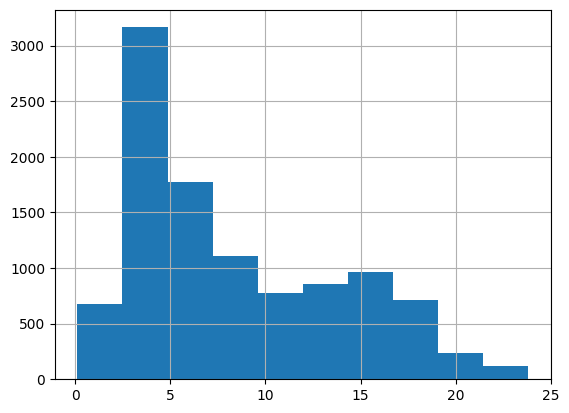

In [535]:
data_q1.dist.hist()

In [536]:
data_q1["dist2"] = np.square(data_q1["dist"])

In [537]:
# basic variables
basic_vars = [
    "dist",
    "dist2",
    "accommodates",
    "beds",
    "bedrooms",
    "room_entire",
    "room_priv",
    "bathroom",
]

# host variables 
host = [
    "host_acceptance_rate",
    "superhost",
    "host_total_listings_count"
]

# reviews
reviews = [
    "number_of_reviews",
    "review_scores_rating"
]

# number of nights 
nights = [
    "minimum_nights",
    "maximum_nights"
]

# amenities 
amenities = [
    "Laundry",
    "Essentials",
    "Heating_Cooling",
    "Kitchen",
    "Outdoor",
    "Workspace",
    "Entertainment",
    "Luxury",
    "Internet",
    "Parking",
    "Family"
]

**Interactions**

In [538]:
def price_diff_by_variables(df, factor_var, dummy_var, factor_lab, dummy_lab):
    stats = df.groupby([factor_var, dummy_var]).agg(
        Mean=("price", np.mean), 
        sd=("price", np.std), 
        size=("price", "size")
    )
    stats["se"] = stats["sd"] / stats["size"] ** (1/2)
    stats["Mean_l"] = stats["Mean"] - (1.96 * stats["se"])
    stats["Mean_u"] = stats["Mean"] + (1.96 * stats["se"])
    stats = stats.drop(["sd", "size"], axis=1).reset_index()

    # Create the plot using seaborn
    # plt.figure(figsize=(10, 6))
    plt.figure()
    
    # Create bar plot
    ax = sns.barplot(
        data=stats,
        x=stats.columns[0],
        y='Mean',
        hue=stats.columns[1],
        palette=['indianred', 'steelblue'],
        ci=None
    )

    # Add error bars
    for i, group in enumerate(stats[stats.columns[1]].unique()):
        group_data = stats[stats[stats.columns[1]] == group]
        x = np.arange(len(group_data))
        
        # Adjust x positions for dodge effect
        if i == 1:
            x = x + 0.2
        else:
            x = x - 0.2
            
        plt.errorbar(
            x=x, 
            y=group_data['Mean'],
            yerr=[(group_data['Mean'] - group_data['Mean_l']), 
                  (group_data['Mean_u'] - group_data['Mean'])],
            fmt='none',
            color='black',
            capsize=3
        )

    # Customize the plot
    plt.xlabel(factor_lab)
    plt.ylabel('Mean Price')
    
    # Customize legend
    plt.legend(
        title=dummy_lab,
        bbox_to_anchor=(0.5, 1.15),
        loc='center',
        ncol=2,
        fontsize=10,
        title_fontsize=10
    )
    
    # Remove grid
    ax.grid(False)
    plt.show()
    
    return plt

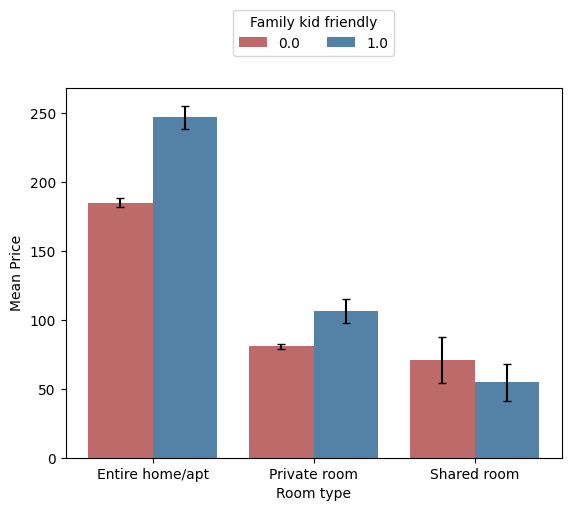

In [539]:
price_diff_by_variables(data_q1,"room_type","Family","Room type", "Family kid friendly");

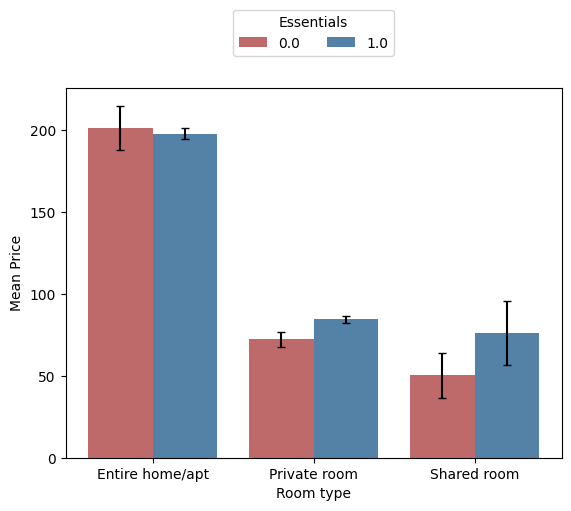

In [540]:
price_diff_by_variables(data_q1,"room_type","Essentials","Room type", "Essentials");

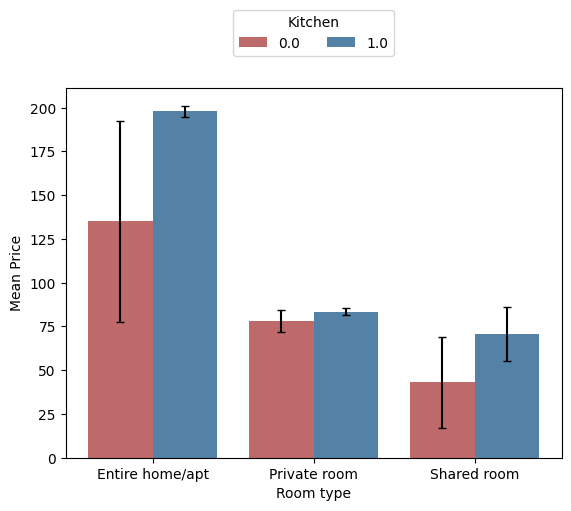

In [541]:
price_diff_by_variables(data_q1,"room_type","Kitchen","Room type", "Kitchen");

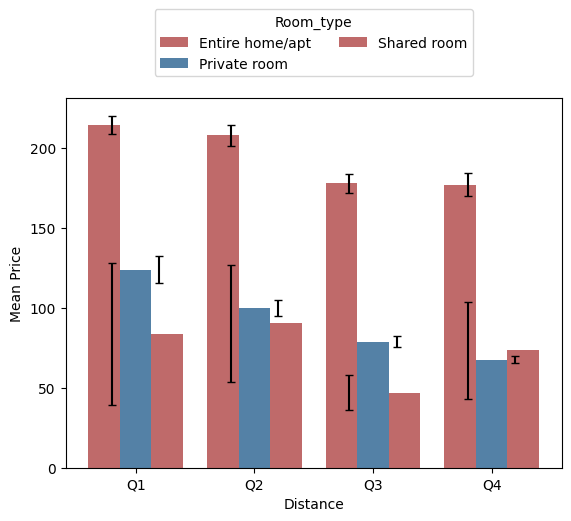

In [542]:
data_q1['dist_category'] = pd.qcut(data_q1['dist'], q=4, labels=['Q1', 'Q2', 'Q3', 'Q4'])
price_diff_by_variables(data_q1,"dist_category","room_type","Distance", "Room_type");

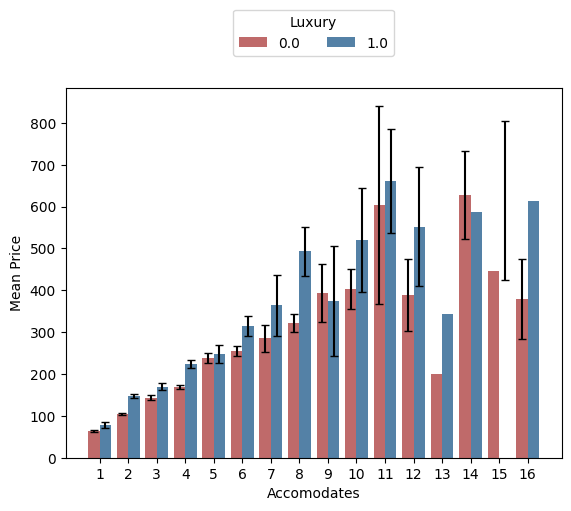

In [543]:
price_diff_by_variables(data_q1,"accommodates","Luxury","Accomodates", "Luxury");

In [544]:
# interactions

int1 = ("room_entire*Family", "room_entire*Family", "room_entire*Kitchen", "room_priv*Kitchen", "room_entire*dist", "room_priv*dist")
int2 = ("minimum_nights*Laundry", "maximum_nights*Workspace", "accommodates*Workspace")

all_interactions = [
    "dist*Laundry", "dist*Essentials", "dist*Heating_Cooling", "dist*Kitchen",
    "dist*Outdoor", "dist*Workspace", "dist*Entertainment", "dist*Luxury",
    "dist*Internet", "dist*Parking", "dist*Family", "dist2*Laundry",
    "dist2*Essentials", "dist2*Heating_Cooling", "dist2*Kitchen", "dist2*Outdoor",
    "dist2*Workspace", "dist2*Entertainment", "dist2*Luxury", "dist2*Internet",
    "dist2*Parking", "dist2*Family", "minimum_nights*Laundry",
    "maximum_nights*Workspace", "accommodates*Workspace", "beds*Kitchen",
    "bathroom*Entertainment"
]

# Exclude variables already in int1 and int2
int3 = tuple(var for var in all_interactions if var not in int1 and var not in int2)


In [545]:
data_q1.describe().T

,count,mean,std,min,25%,50%,75%,max
id,10384.0,4.938665e+17,4.379677e+17,26654.000000,3.666926e+07,6.740000e+17,9.030000e+17,1.110000e+18
host_id,10384.0,2.163332e+08,1.939147e+08,28515.000000,3.665556e+07,1.463284e+08,4.224994e+08,5.654027e+08
host_acceptance_rate,10384.0,8.739002e+01,2.103668e+01,0.000000,8.400000e+01,9.700000e+01,1.000000e+02,1.000000e+02
host_total_listings_count,10384.0,9.220724e+00,2.783047e+01,1.000000,1.000000e+00,3.000000e+00,7.000000e+00,5.990000e+02
latitude,10384.0,4.368557e+01,5.082786e-02,43.585750,4.364651e+01,4.366625e+01,4.371320e+01,4.383841e+01
longitude,10384.0,-7.939792e+01,7.476522e-02,-79.623950,-7.943370e+01,-7.939795e+01,-7.937154e+01,-7.912659e+01
accommodates,10384.0,3.172381e+00,1.988831e+00,1.000000,2.000000e+00,2.000000e+00,4.000000e+00,1.600000e+01
bedrooms,10384.0,1.422477e+00,8.868138e-01,0.000000,1.000000e+00,1.000000e+00,2.000000e+00,9.000000e+00
beds,10384.0,1.696938e+00,1.117539e+00,0.000000,1.000000e+00,1.000000e+00,2.000000e+00,1.000000e+01
price,10384.0,1.580658e+02,1.255442e+02,13.000000,7.600000e+01,1.200000e+02,2.000000e+02,1.000000e+03


### <span style="color:blue"><b>2. Model building</b></span>

#### &nbsp;&nbsp;&nbsp;&nbsp;<span style="color:black"><b>A. OLS</b></span>

Modelling

In [546]:
model1 = "~ dist + dist2"
model2 = "~"+"+".join(basic_vars)
model3 = "~"+"+".join(basic_vars)+"+"+"+".join(host)+"+"+"+".join(nights)
model4 = "~"+"+".join(basic_vars)+"+"+"+".join(host)+"+"+"+".join(nights)+"+"+"+".join(reviews)+"+"+"+".join(int1)
model5 = "~"+"+".join(basic_vars)+"+"+"+".join(host)+"+"+"+".join(nights)+"+"+"+".join(reviews)+"+"+"+".join(int1)+"+"+"+".join(int2)+"+"+"+".join(amenities)
model6 = "~"+"+".join(basic_vars)+"+"+"+".join(host)+"+"+"+".join(nights)+"+"+"+".join(reviews)+"+"+"+".join(int1)+"+"+"+".join(int2)+"+"+"+".join(amenities)+"+"+"+".join(int3)

In [547]:
smp_size = round(0.2 * data_q1.shape[0])-1
smp_size

2076

In [548]:
# Set the seed to make results reproducable
np.random.seed(20250217)

In [549]:
from sklearn.model_selection import train_test_split

In [550]:
data_q1_work, df_holdout=train_test_split(data_q1, test_size=smp_size)

In [551]:
print(data_q1_work.shape)
print(df_holdout.shape)

(8308, 41)
(2076, 41)


In [552]:
n_folds=5

In [553]:
from sklearn.model_selection import KFold
from statsmodels.tools.eval_measures import mse,rmse
k = KFold(n_splits=n_folds, shuffle=False, random_state=None)

In [554]:
def cv_reg(formula, df, kfold, testdf, robustse=None):
    regression_list = []
    predicts_on_test = []
    rsquared = []
    rmse_list = []
    rmse_list_test = []

    # Calculating OLS for each fold

    for train_index, test_index in k.split(df):
        df_train, df_test = df.iloc[train_index, :], df.iloc[test_index, :]
        if robustse is None:
            model = smf.ols(formula, data = df_train).fit()
        else:
            model = smf.ols(formula, data = df_train).fit(cov_type=robustse)
        regression_list += [model]
        predicts_on_test += [model.predict(df_test)]
        rsquared += [model.rsquared]

        rmse_tr = pd.concat(
            [df_train["price"], model.predict(df_train)],
            axis=1,
            keys=["price", "predicted"],
        )
        rmse_tr = rmse_tr[~rmse_tr.isna().any(axis=1)]

        rmse_te = pd.concat(
            [df_test["price"], model.predict(df_test)],
            axis=1,
            keys=["price", "predicted"],
        )
        rmse_te = rmse_te[~rmse_te.isna().any(axis=1)]

        rmse_list += [rmse(rmse_tr["price"], rmse_tr["predicted"], axis=0)]
        rmse_list_test += [rmse(rmse_te["price"], rmse_te["predicted"], axis=0)]
    nvars = model.df_model

    return {
        "regressions": regression_list,
        "test_predict": predicts_on_test,
        "r2": rsquared,
        "rmse": rmse_list,
        "rmse_test": rmse_list_test,
        "nvars": nvars,
    }


def summarize_cv(cvlist, stat="rmse"):
    result = pd.DataFrame(
        {"Model" + str(x + 1): cvlist[x][stat] for x in range(len(cvlist))}
    )
    result["Resample"] = ["Fold" + str(x + 1) for x in range(len(cvlist[0]["rmse"]))]
    result = result.set_index("Resample")
    result = pd.concat([result, pd.DataFrame(result.mean(), columns=["Average"]).T])
    return result

In [555]:
cv_list = []
for i in [
    model1,
    model2,
    model3,
    model4,
    model5,
    model6,
]:
    cv_list += [cv_reg("price" + i, data_q1, k, "HC0")]

In [556]:
summarize_cv(cv_list).map('{:,.3f}'.format)

,Model1,Model2,Model3,Model4,Model5,Model6
Fold1,121.739,91.117,89.820,89.509,88.064,87.603
Fold2,120.988,89.739,88.504,88.128,86.858,86.477
Fold3,118.035,87.731,86.321,85.914,84.696,84.060
Fold4,119.700,88.912,87.665,87.278,85.997,85.551
Fold5,123.089,92.470,90.975,90.572,89.292,88.884
Average,120.710,89.994,88.657,88.280,86.982,86.515


In [557]:
# RMSE training vs test graph

rmse_levels = {"nvars": [], "var": [], "value": []}
for i in range(0, 6):
    rmse_levels["nvars"].append(int(cv_list[i]["nvars"]))
    rmse_levels["var"].append("RMSE Training")
    rmse_levels["value"].append(pd.Series(cv_list[i]["rmse"]).mean())
for i in range(0, 6):
    rmse_levels["nvars"].append(int(cv_list[i]["nvars"]))
    rmse_levels["var"].append("RMSE Test")
    rmse_levels["value"].append(pd.Series(cv_list[i]["rmse_test"]).mean())
df_rmse_levels = pd.DataFrame.from_dict(rmse_levels)
df_rmse_levels["nvars2"] = df_rmse_levels["nvars"] + 1

In [558]:
df_rmse_levels

,nvars,var,value,nvars2
0,2,RMSE Training,120.710165,3
1,8,RMSE Training,89.993970,9
2,13,RMSE Training,88.657003,14
3,22,RMSE Training,88.280331,23
4,34,RMSE Training,86.981583,35
5,58,RMSE Training,86.514997,59
6,2,RMSE Test,120.920998,3
7,8,RMSE Test,90.166200,9
8,13,RMSE Test,89.036304,14
9,22,RMSE Test,89.017612,23


In [559]:
rmse_ols = 86.514997

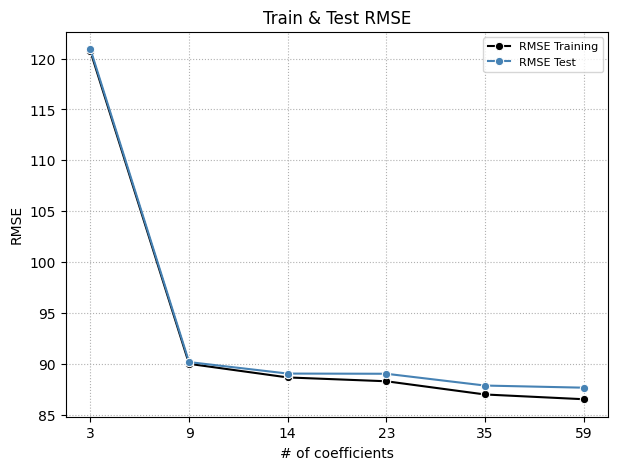

In [560]:
plt.figure(figsize=(7,5))
ax = sns.lineplot(
    x = [str(x) for x in df_rmse_levels['nvars2']], 
    y = df_rmse_levels['value'], 
    hue = df_rmse_levels['var'], marker = 'o',
    palette = ['k', 'steelblue']
)
ax.set_title('Train & Test RMSE')
ax.set_ylabel('RMSE')
ax.set_xlabel('# of coefficients')
ax.legend(fontsize = 8, title = None)
ax.grid(linestyle = ':')
plt.show();

#### &nbsp;&nbsp;&nbsp;&nbsp;<span style="color:black"><b>B. Lasso</b></span>

In [561]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split, RepeatedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
import patsy

In [562]:
# Using Patsy to create the model matrices
# define model evaluation method
cv = RepeatedKFold(n_splits=5, n_repeats=1, random_state=1)
y, X = patsy.dmatrices("price" + model6, data_q1)

In [563]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=smp_size, random_state=10
)

lambdas = [i/100 for i in range(5, 100,5)]

train_r_squared = np.zeros(len(lambdas))
test_r_squared = np.zeros(len(lambdas))

pred_num = X.shape[1]
coeff_a = np.zeros((len(lambdas), pred_num))

In [564]:
import datetime

In [565]:
import datetime

In [566]:
from sklearn.model_selection import cross_val_score

for ind, i in enumerate(lambdas):
    print(f"Run: {str(ind).rjust(2)}, lambda: {i:.2f}, start: {datetime.datetime.now().strftime('%Y-%m-%d %H:%M:%S')}")
    reg = Lasso(alpha = i, random_state= 20250217) # In Python, Lasso's lambda is called alpha. Why?
    reg.fit(X_train, y_train)
    results = cross_val_score(reg, X, y, cv=cv, scoring="r2")

    train_r_squared[ind] = reg.score(X_train, y_train)    
    test_r_squared[ind] = reg.score(X_test, y_test)

Run:  0, lambda: 0.05, start: 2025-03-02 19:29:33
Run:  1, lambda: 0.10, start: 2025-03-02 19:29:36
Run:  2, lambda: 0.15, start: 2025-03-02 19:29:37
Run:  3, lambda: 0.20, start: 2025-03-02 19:29:39
Run:  4, lambda: 0.25, start: 2025-03-02 19:29:39
Run:  5, lambda: 0.30, start: 2025-03-02 19:29:40
Run:  6, lambda: 0.35, start: 2025-03-02 19:29:40
Run:  7, lambda: 0.40, start: 2025-03-02 19:29:41
Run:  8, lambda: 0.45, start: 2025-03-02 19:29:41
Run:  9, lambda: 0.50, start: 2025-03-02 19:29:42
Run: 10, lambda: 0.55, start: 2025-03-02 19:29:42
Run: 11, lambda: 0.60, start: 2025-03-02 19:29:43
Run: 12, lambda: 0.65, start: 2025-03-02 19:29:44
Run: 13, lambda: 0.70, start: 2025-03-02 19:29:45
Run: 14, lambda: 0.75, start: 2025-03-02 19:29:46
Run: 15, lambda: 0.80, start: 2025-03-02 19:29:47
Run: 16, lambda: 0.85, start: 2025-03-02 19:29:47
Run: 17, lambda: 0.90, start: 2025-03-02 19:29:48
Run: 18, lambda: 0.95, start: 2025-03-02 19:29:49


In [567]:
results

array([0.51164519, 0.53496836, 0.5145571 , 0.50790841, 0.51836723])

In [568]:
r_squared_df = (
    pd.DataFrame(
        {
            "$R^2$ Test set": test_r_squared,
            "$R^2$ Training set": train_r_squared,
            "lambda": lambdas,
        }
    )
    .melt(id_vars=["lambda"])
)

In [569]:
r_squared_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38 entries, 0 to 37
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   lambda    38 non-null     float64
 1   variable  38 non-null     object 
 2   value     38 non-null     float64
dtypes: float64(2), object(1)
memory usage: 1.0+ KB


In [570]:
r_squared_df["variable"] = r_squared_df["variable"].astype("category").cat.reorder_categories(
    ["$R^2$ Training set", "$R^2$ Test set"]
)

In [571]:
r_squared_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38 entries, 0 to 37
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   lambda    38 non-null     float64 
 1   variable  38 non-null     category
 2   value     38 non-null     float64 
dtypes: category(1), float64(2)
memory usage: 898.0 bytes


In [572]:
r_squared_df

,lambda,variable,value
0,0.05,$R^2$ Test set,0.531196
1,0.10,$R^2$ Test set,0.531218
2,0.15,$R^2$ Test set,0.531136
3,0.20,$R^2$ Test set,0.531042
4,0.25,$R^2$ Test set,0.531109
5,0.30,$R^2$ Test set,0.531179
6,0.35,$R^2$ Test set,0.531226
7,0.40,$R^2$ Test set,0.531279
8,0.45,$R^2$ Test set,0.531335
9,0.50,$R^2$ Test set,0.531380


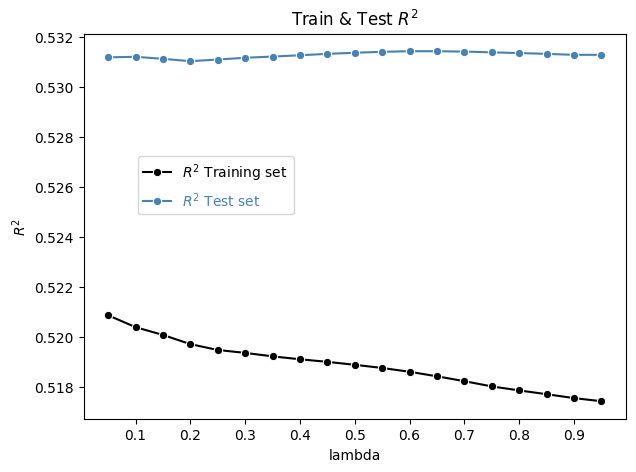

In [573]:
plt.figure(figsize=(7,5))
ax = sns.lineplot(
    data = r_squared_df, 
    x = 'lambda', y = 'value', hue = 'variable', 
    palette = ['k', 'steelblue'],
    marker = 'o'
)
ax.set_title('Train & Test $R^2$')
ax.set_ylabel('$R^2$')
ax.set_xlabel('lambda')
ax.set_xticks(lambdas[1::2])
ax.legend(fontsize = 10, title = None, labelcolor = ['k', 'steelblue'], loc='upper right', bbox_to_anchor=(0.4, 0.7))
plt.show();

In [574]:
df_lam = pd.DataFrame(test_r_squared*100, columns=['R_squared'])
df_lam['lambda'] = (lambdas)
# returns the index of the row where column has maximum value.
df_lam.loc[df_lam['R_squared'].idxmax()]

R_squared    53.144074
lambda        0.650000
Name: 12, dtype: float64

In [575]:
reg_best = Lasso(alpha = df_lam.loc[df_lam['R_squared'].idxmax()]['lambda'])
reg_best.fit(X_train, y_train)

Lasso(alpha=0.65)

In [576]:
reg_best.coef_[reg_best.coef_>0]

array([27.66916972, 17.04688636, 20.81925189,  7.06320999,  1.85320507,
        0.91211555,  2.78348393,  3.394702  ,  3.41842028,  0.30695692,
        1.3013944 ,  8.25659759,  3.86451293,  2.13695429,  9.78173801,
        0.50525298,  0.81144042, 24.92457426])

In [577]:
print(reg_best.coef_)

[  0.          -0.          -0.          27.66916972   0.
  17.04688636  20.81925189  -0.           7.06320999   1.85320507
   0.91211555   2.78348393 -10.16667606  -0.          -1.59661025
   3.394702     0.           3.41842028   0.           0.30695692
  -0.          -5.30619396   0.           1.3013944   -4.82682277
  -0.75676895  -0.           8.25659759  -1.28735572   3.86451293
   2.13695429  -0.           9.78173801  -0.47732069   0.50525298
  -0.          -0.62550204  -5.04023045  -0.95736265  -0.
  -3.3479387  -11.22380548   0.81144042  -2.29233491  -0.
  -0.          -0.          -0.          -0.          -0.
  -0.          -0.          -0.           0.          -0.
  -0.          -0.26439035   0.          24.92457426]


In [578]:
reg_best.get_params()

{'alpha': 0.65,
 'copy_X': True,
 'fit_intercept': True,
 'max_iter': 1000,
 'positive': False,
 'precompute': False,
 'random_state': None,
 'selection': 'cyclic',
 'tol': 0.0001,
 'warm_start': False}

In [579]:
print(f'{mean_squared_error(y_test, reg_best.predict(X_test)):,.2f}')

7,097.79


In [580]:
rmse_lasso = np.sqrt(mean_squared_error(y_test, reg_best.predict(X_test)))
rmse_lasso

84.24839668781527

In [581]:
# List of feature names you used to create the design matrix (X)
# This should include all variables that you have added to your model (both main and interaction terms)
feature_names = patsy.dmatrices("price" + model6, data_q1)[1].design_info.column_names

# Fit the model with the best lambda
reg_best = Lasso(alpha=df_lam.loc[df_lam['R_squared'].idxmax()]['lambda'])
reg_best.fit(X_train, y_train)

# Extract the non-zero coefficients (selected variables)
selected_variables = [feature_names[i] for i in range(len(reg_best.coef_)) if reg_best.coef_[i] != 0]

# Display the selected variables
print("Selected variables by Lasso:")
for var in selected_variables:
    print(var)

Selected variables by Lasso:
accommodates
bedrooms
room_entire
bathroom
host_acceptance_rate
superhost
host_total_listings_count
minimum_nights
number_of_reviews
review_scores_rating
room_entire:Family
room_entire:Kitchen
room_entire:dist
Laundry
minimum_nights:Laundry
Workspace
accommodates:Workspace
Essentials
Heating_Cooling
Outdoor
Luxury
Internet
Parking
dist:Essentials
dist:Heating_Cooling
dist:Kitchen
dist:Workspace
dist:Entertainment
dist:Luxury
dist:Internet
dist2:Family
bathroom:Entertainment


#### &nbsp;&nbsp;&nbsp;&nbsp;<span style="color:black"><b>C. Random forest</b></span>

In [582]:
y, X = patsy.dmatrices("price" + model6, data_q1)

In [583]:
import math

In [584]:
print('The theoretical recommended number of variables: {:.2f}.'.format(math.sqrt(len(X.design_info.column_names)))) 

The theoretical recommended number of variables: 7.68.


In [585]:
rfr = RandomForestRegressor(random_state = 20250224)

In [586]:
tune_grid = {"max_features": [6, 8, 10, 12], "min_samples_leaf": [5, 10, 15]}
tune_grid

{'max_features': [6, 8, 10, 12], 'min_samples_leaf': [5, 10, 15]}

In [587]:
rf_random = GridSearchCV(
    estimator = rfr,
    param_grid = tune_grid,
    cv = 5,
    scoring = "neg_root_mean_squared_error",
    verbose = 3,
)

In [588]:
%%time 
rf_model = rf_random.fit(X, y.ravel())

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV 1/5] END max_features=6, min_samples_leaf=5;, score=-80.245 total time=   2.5s
[CV 2/5] END max_features=6, min_samples_leaf=5;, score=-84.830 total time=   2.4s
[CV 3/5] END max_features=6, min_samples_leaf=5;, score=-95.189 total time=   2.6s
[CV 4/5] END max_features=6, min_samples_leaf=5;, score=-89.658 total time=   2.5s
[CV 5/5] END max_features=6, min_samples_leaf=5;, score=-77.057 total time=   2.4s
[CV 1/5] END max_features=6, min_samples_leaf=10;, score=-80.280 total time=   2.1s
[CV 2/5] END max_features=6, min_samples_leaf=10;, score=-85.383 total time=   2.2s
[CV 3/5] END max_features=6, min_samples_leaf=10;, score=-95.705 total time=   1.9s
[CV 4/5] END max_features=6, min_samples_leaf=10;, score=-89.679 total time=   1.9s
[CV 5/5] END max_features=6, min_samples_leaf=10;, score=-77.511 total time=   1.9s
[CV 1/5] END max_features=6, min_samples_leaf=15;, score=-80.816 total time=   1.8s
[CV 2/5] END max_fea

In [589]:
rf_model.cv_results_

{'mean_fit_time': array([2.54300427, 2.06621909, 1.78269868, 2.82291837, 2.85345764,
        2.23589768, 3.40419445, 2.93154469, 2.73110127, 4.02879262,
        3.47342463, 3.20764451]),
 'std_fit_time': array([0.07135834, 0.12530663, 0.04176455, 0.03977469, 0.45053385,
        0.03357819, 0.04255601, 0.03202707, 0.05657857, 0.04633495,
        0.05790451, 0.06005333]),
 'mean_score_time': array([0.03749886, 0.02873034, 0.02692361, 0.03390303, 0.03120847,
        0.02773232, 0.03331218, 0.02912884, 0.02712765, 0.03291225,
        0.02932248, 0.02712798]),
 'std_score_time': array([4.39727039e-03, 7.39393766e-04, 4.42817183e-06, 6.40836066e-04,
        2.53289426e-03, 7.40307977e-04, 4.89171356e-04, 3.95829111e-04,
        7.46189542e-04, 6.31430188e-04, 4.88929267e-04, 7.46225488e-04]),
 'param_max_features': masked_array(data=[6, 6, 6, 8, 8, 8, 10, 10, 10, 12, 12, 12],
              mask=[False, False, False, False, False, False, False, False,
                    False, False, False, 

In [590]:
df_rf_model_cv_results = pd.DataFrame(rf_model.cv_results_)[[
    'param_max_features', 'param_min_samples_leaf', 'mean_test_score']]

In [591]:
df_rf_model_cv_results.columns = ['max features', 'min node size', 'RMSE']

In [592]:
df_rf_model_cv_results

,max features,min node size,RMSE
0,6,5,-85.395866
1,6,10,-85.711340
2,6,15,-85.855434
3,8,5,-85.276445
4,8,10,-85.433343
5,8,15,-85.556695
6,10,5,-85.187026
7,10,10,-85.230945
8,10,15,-85.452126
9,12,5,-85.189247


In [593]:
df_rf_model_cv_results.pivot(
    index = 'max features', 
    columns = 'min node size', 
    values = 'RMSE').round(2)*-1

min node size,5,10,15
max features,,,
6,85.40,85.71,85.86
8,85.28,85.43,85.56
10,85.19,85.23,85.45
12,85.19,85.15,85.42


In [594]:
rmse_rf = rf_model.best_score_*(-1)
rmse_rf

85.14790538311456

In [595]:
rf_model.best_params_

{'max_features': 12, 'min_samples_leaf': 10}

In [596]:
rf_model.best_estimator_

RandomForestRegressor(max_features=12, min_samples_leaf=10,
                      random_state=20250224)

In [597]:
y_h, X_h = patsy.dmatrices("price" + model6, data_q1)
pred = rf_model.predict(X_h)

In [598]:
rmse(y_h, pred)

array([126.87339991, 128.77673922, 142.33500857, ..., 163.31508265,
       150.5160883 , 159.93015118])

In [599]:
mean_squared_error(y_h, pred, squared= False)

70.25748318947952

#### &nbsp;&nbsp;&nbsp;&nbsp;<span style="color:black"><b>D. GBM</b></span>

In [600]:
gbm = GradientBoostingRegressor(
    learning_rate=0.1,
    min_samples_split=20,
    max_features=10
)

In [601]:
gbm_model_cv = GridSearchCV(
    gbm,
    tune_grid,
    cv=5,
    scoring="neg_root_mean_squared_error",
    verbose=10,
    n_jobs=1  # Use only one job to avoid the pickling issue
)

In [602]:
gbm_model_cv.fit(X, y)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV 1/5; 1/12] START max_features=6, min_samples_leaf=5.........................
[CV 1/5; 1/12] END max_features=6, min_samples_leaf=5;, score=-80.054 total time=   1.0s
[CV 2/5; 1/12] START max_features=6, min_samples_leaf=5.........................
[CV 2/5; 1/12] END max_features=6, min_samples_leaf=5;, score=-83.177 total time=   1.0s
[CV 3/5; 1/12] START max_features=6, min_samples_leaf=5.........................
[CV 3/5; 1/12] END max_features=6, min_samples_leaf=5;, score=-93.998 total time=   0.9s
[CV 4/5; 1/12] START max_features=6, min_samples_leaf=5.........................
[CV 4/5; 1/12] END max_features=6, min_samples_leaf=5;, score=-88.493 total time=   0.9s
[CV 5/5; 1/12] START max_features=6, min_samples_leaf=5.........................
[CV 5/5; 1/12] END max_features=6, min_samples_leaf=5;, score=-77.997 total time=   0.9s
[CV 1/5; 2/12] START max_features=6, min_samples_leaf=10........................
[CV 1/5;

GridSearchCV(cv=5,
             estimator=GradientBoostingRegressor(max_features=10,
                                                 min_samples_split=20),
             n_jobs=1,
             param_grid={'max_features': [6, 8, 10, 12],
                         'min_samples_leaf': [5, 10, 15]},
             scoring='neg_root_mean_squared_error', verbose=10)

In [603]:
gbm_model_cv.cv_results_

{'mean_fit_time': array([1.00868449, 0.99294405, 0.96682367, 1.27280192, 1.28118491,
        1.27281203, 1.54248247, 1.53468852, 1.67171988, 1.99627109,
        1.84425836, 1.8381743 ]),
 'std_fit_time': array([0.03086903, 0.04037995, 0.01061427, 0.04155484, 0.04542435,
        0.03422802, 0.04986001, 0.03399554, 0.09165807, 0.16175737,
        0.04386274, 0.04328048]),
 'mean_score_time': array([0.00566053, 0.00478725, 0.00418477, 0.0047802 , 0.00438251,
        0.00418186, 0.00458679, 0.00937428, 0.0047915 , 0.00477891,
        0.00478816, 0.00418806]),
 'std_score_time': array([0.00287022, 0.00039926, 0.00039529, 0.00160084, 0.00049408,
        0.00040299, 0.00048705, 0.01077085, 0.00075082, 0.00074605,
        0.00039923, 0.00039864]),
 'param_max_features': masked_array(data=[6, 6, 6, 8, 8, 8, 10, 10, 10, 12, 12, 12],
              mask=[False, False, False, False, False, False, False, False,
                    False, False, False, False],
        fill_value=999999),
 'param_min_

In [604]:
rmse_gbm = gbm_model_cv.best_score_ * -1
rmse_gbm

84.46853041106517

#### &nbsp;&nbsp;&nbsp;&nbsp;<span style="color:black"><b>E. CART</b></span>

In [605]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import RandomizedSearchCV

In [606]:
X.shape

(10384, 59)

In [607]:
cart_model = DecisionTreeRegressor(random_state=20250224)

In [608]:
path = cart_model.cost_complexity_pruning_path(X, y.ravel())
ccp_alphas, impurities = path.ccp_alphas, path.impurities

In [609]:
ccp_alphas

array([0.00000000e+00, 3.21006677e-05, 4.81510015e-05, ...,
       7.02715524e+02, 1.31842399e+03, 4.07867403e+03])

In [610]:
impurities

array([3.41390601e-02, 3.42032614e-02, 3.42514124e-02, ...,
       1.03627379e+04, 1.16811619e+04, 1.57598359e+04])

In [611]:
%%time

cart_model_cv = RandomizedSearchCV(
    cart_model,
    {"ccp_alpha":ccp_alphas},
    cv = 5,
    scoring="neg_root_mean_squared_error",
    verbose = 3,
)
cart_model_cv.fit(X,y.ravel())

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV 1/5] END ...ccp_alpha=0.0524364406779661;, score=-118.775 total time=   0.5s
[CV 2/5] END ...ccp_alpha=0.0524364406779661;, score=-121.036 total time=   0.5s
[CV 3/5] END ...ccp_alpha=0.0524364406779661;, score=-129.095 total time=   0.5s
[CV 4/5] END ...ccp_alpha=0.0524364406779661;, score=-125.945 total time=   0.5s
[CV 5/5] END ...ccp_alpha=0.0524364406779661;, score=-128.006 total time=   0.5s
[CV 1/5] END ccp_alpha=0.0023593990755007704;, score=-119.003 total time=   0.4s
[CV 2/5] END ccp_alpha=0.0023593990755007704;, score=-121.182 total time=   0.4s
[CV 3/5] END ccp_alpha=0.0023593990755007704;, score=-129.125 total time=   0.4s
[CV 4/5] END ccp_alpha=0.0023593990755007704;, score=-126.247 total time=   0.5s
[CV 5/5] END ccp_alpha=0.0023593990755007704;, score=-128.334 total time=   0.4s
[CV 1/5] END ccp_alpha=0.0017382511556241422;, score=-119.004 total time=   0.4s
[CV 2/5] END ccp_alpha=0.0017382511556241422;, s

RandomizedSearchCV(cv=5, estimator=DecisionTreeRegressor(random_state=20250224),
                   param_distributions={'ccp_alpha': array([0.00000000e+00, 3.21006677e-05, 4.81510015e-05, ...,
       7.02715524e+02, 1.31842399e+03, 4.07867403e+03])},
                   scoring='neg_root_mean_squared_error', verbose=3)

In [612]:
cart_model_cv.best_estimator_

DecisionTreeRegressor(ccp_alpha=0.6933744221879815, random_state=20250224)

In [613]:
rmse_cart = pd.DataFrame(cart_model_cv.cv_results_).loc[
    lambda x: x.param_ccp_alpha == cart_model_cv.best_estimator_.ccp_alpha
].mean_test_score.values[0] * -1
rmse_cart

122.16275308436812

#### **Horserace Table**

In the model comparison, LASSO performed the best with the lowest cross-validation RMSE of 84.25. This can be attributed to its regularization feature, which helps prevent overfitting by penalizing large coefficients and performing feature selection. As a result, LASSO strikes a balance between fitting the data and maintaining the model's ability to generalize to new, unseen data.

On the other hand, CART performed the worst with an RMSE of 116.46, indicating poor generalization. Decision trees, like CART, are prone to overfitting, especially if not properly tuned, which can lead to complex models that fit noise in the data rather than the underlying patterns. This overfitting reduces the model's performance on validation data, resulting in higher prediction errors.

In [614]:
pd.DataFrame({'model': ['OLS', 'LASSO', 'Random Forest', 'GBM', 'CART'],
              'CV RMSE': [rmse_ols, rmse_lasso, rmse_rf, rmse_gbm, rmse_cart]})

,model,CV RMSE
0,OLS,86.514997
1,LASSO,84.248397
2,Random Forest,85.147905
3,GBM,84.468530
4,CART,122.162753


### <span style="color:blue"><b>3. Feature importance</b></span>

In [615]:
rf_model.best_estimator_.feature_importances_

array([0.00000000e+00, 1.17450026e-02, 8.91996130e-03, 1.40545071e-01,
       3.23788029e-02, 1.08309086e-01, 3.17110911e-02, 1.25416497e-02,
       6.45605349e-02, 8.10633330e-03, 2.42996221e-03, 1.30144339e-02,
       2.98122158e-02, 1.04541114e-02, 1.05502141e-02, 1.21728312e-02,
       1.36087429e-03, 1.33162738e-03, 2.54463948e-06, 3.95904546e-02,
       9.81774868e-03, 3.61543163e-02, 1.47953651e-02, 2.67804200e-04,
       2.30270310e-02, 5.50071415e-04, 5.76592981e-03, 4.24703335e-02,
       3.42486597e-05, 0.00000000e+00, 7.61494746e-04, 2.79370265e-03,
       4.93090778e-03, 0.00000000e+00, 3.05946701e-04, 7.12459034e-03,
       8.76916995e-03, 7.71229880e-03, 7.27811956e-03, 7.05892887e-03,
       6.15658817e-03, 1.19020626e-02, 9.05950267e-03, 1.01598989e-02,
       6.67301242e-03, 3.67670375e-03, 6.08039088e-03, 8.53449220e-03,
       6.89098698e-03, 8.81596370e-03, 6.60249663e-03, 5.74056811e-03,
       1.11346370e-02, 1.01641434e-02, 9.89440064e-03, 5.79467648e-03,
      

In [616]:
pd.DataFrame(
    rf_model.best_estimator_.feature_importances_, 
    X.design_info.column_names)

,0
Intercept,0.000000
dist,0.011745
dist2,0.008920
accommodates,0.140545
beds,0.032379
bedrooms,0.108309
room_entire,0.031711
room_priv,0.012542
bathroom,0.064561
host_acceptance_rate,0.008106


In [617]:
df_var_imp = pd.DataFrame(
    rf_model.best_estimator_.feature_importances_, 
    X.design_info.column_names)\
    .reset_index()\
    .rename({"index": "variable", 0: "imp"}, axis=1)\
    .sort_values(by=["imp"], ascending=False)\
    .reset_index(drop = True)

df_var_imp['cumulative_imp'] = df_var_imp['imp'].cumsum()

The feature importance analysis from the Random Forest model shows that accommodates (14.1%), bedrooms (10.8%), and bathroom-related features (10.6%) are the most significant predictors of Airbnb pricing. Interaction terms, such as bathroom:Entertainment (10.6%) and room_entire:Kitchen (4.0%), suggest that property features combined with amenities influence listing performance. Distance-related factors (e.g., dist:Entertainment, dist2:Luxury) also play a role, indicating that proximity to attractions and services affects pricing. Interestingly, while review scores and number of reviews have some influence (1.1%-1.2%), they contribute far less than property size and location.

Notably, standalone amenities like kitchens, laundry, and internet have near-zero importance but become relevant when combined with other factors (e.g., dist:Kitchen). This suggests that essential services alone do not drive price changes, but their impact is amplified when linked to location or room type. For hosts, focusing on increasing guest capacity and emphasizing proximity to key attractions could maximize earnings. Similarly, urban planners can leverage these insights to improve accessibility to entertainment hubs, boosting property demand. Overall, property characteristics, location, and interactions between features are the primary drivers of Airbnb listing prices.

In [618]:
df_var_imp.style.format({
    'imp': lambda x: f'{x:,.1%}',
    'cumulative_imp': lambda x: f'{x:,.1%}'})

,variable,imp,cumulative_imp
0,accommodates,14.1%,14.1%
1,bedrooms,10.8%,24.9%
2,bathroom:Entertainment,10.6%,35.5%
3,bathroom,6.5%,42.0%
4,beds:Kitchen,4.4%,46.4%
5,accommodates:Workspace,4.2%,50.6%
6,room_entire:Kitchen,4.0%,54.6%
7,room_entire:dist,3.6%,58.2%
8,beds,3.2%,61.4%
9,room_entire,3.2%,64.6%


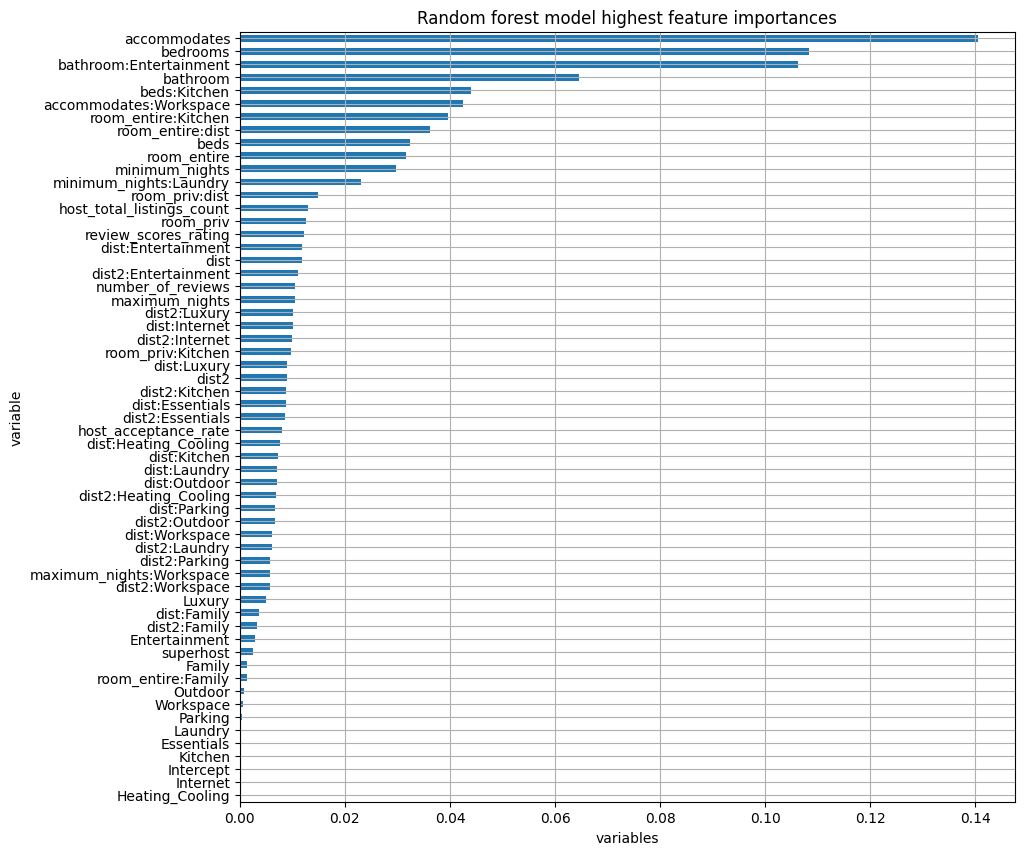

In [619]:
df_var_imp\
    .sort_values(by = 'imp')\
    .plot(kind = 'barh', 
          x = 'variable', y = 'imp', 
          figsize = (10,10), grid = True, 
          title = 'Random forest model highest feature importances', 
          xlabel = 'variables', legend = False
         );

In [620]:
cutoff = 0.01

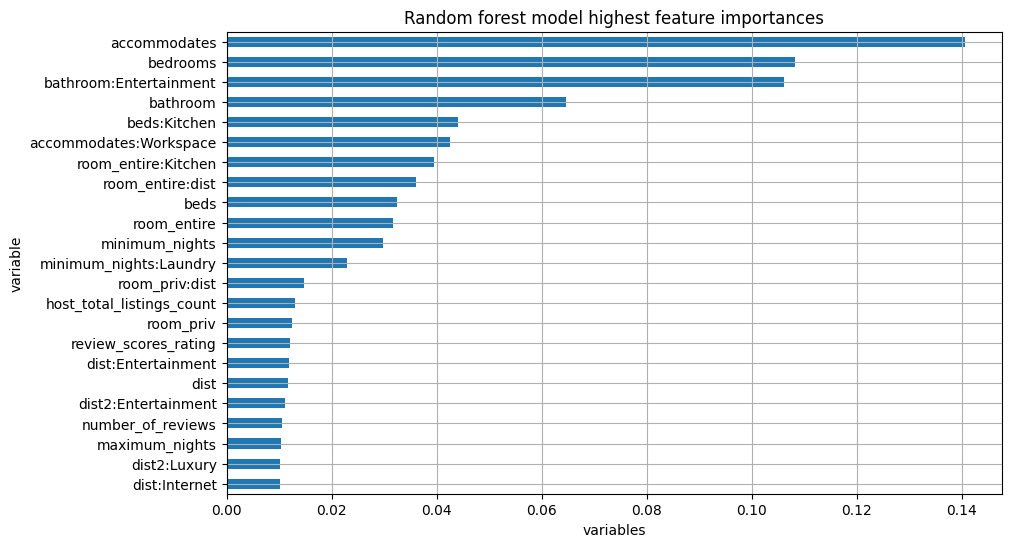

In [621]:
df_var_imp[df_var_imp.imp > cutoff]\
    .sort_values(by = 'imp')\
    .plot(kind = 'barh', 
          x = 'variable', y = 'imp', 
          figsize = (10,6), grid = True, 
          title = 'Random forest model highest feature importances', 
          xlabel = 'variables', legend = False
         );

### <span style="color:blue"><b>4. Validity</b></span>

#### <span style="color:black"><b>A. Validity: Toronto - 2024Q4</b></span>

In [622]:
data_q4 = pd.read_csv("https://raw.githubusercontent.com/Enkhsaikhan-u/Building-prediction-model-on-Airbnb-listings/refs/heads/main/listings_2024Q1.csv")

#### **Data Cleaning**

In [623]:
data_q4 = data_q4[["id", "host_id", "host_response_time", "host_acceptance_rate", "host_is_superhost", 
                   "host_total_listings_count", "latitude", "longitude", "property_type", "room_type", "accommodates",
                   "bathrooms_text", "bedrooms", "beds", "price", "minimum_nights", "maximum_nights", "number_of_reviews",
                   "review_scores_rating", "amenities", "neighbourhood", "neighbourhood_cleansed"]]


#Converting price variable to float
data_q4["price"] = data_q4["price"].replace({'\$': '', ',': ''}, regex=True).astype(float)


#Converting bathroom variable to float
data_q4["bathroom"] = data_q4["bathrooms_text"].replace(r'[^\d.]', '', regex=True).replace('', np.nan).astype(float)


data_q4["host_acceptance_rate"] = data_q4["host_acceptance_rate"].astype(str).str.replace("%", "").replace("nan", np.nan).astype(float)


#Dropping missing values
data_q4 = data_q4.dropna(subset=["host_acceptance_rate", "host_is_superhost", "beds",
                                   "host_total_listings_count", "bedrooms", "price", "review_scores_rating", "bathroom"])


#### **Feature engineering**

In [624]:
data_q4["superhost"] = np.where(data_q4["host_is_superhost"] == "t", 1, 0)
data_q4["superhost"] = np.where(data_q4["host_is_superhost"] == "t", 1, 0)

data_q4["room_entire"] = np.where(data_q4["room_type"] == "Entire home/apt", 1, 0)
data_q4["room_priv"] = np.where(data_q4["room_type"] == "Private room", 1, 0)

Making amenities dummy variables

In [625]:
import ast
import re
import pandas as pd

# Convert amenities from string to list safely
data_q4['amenities'] = data_q4['amenities'].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else x)

# Define category mapping dictionary
category_map = {
    'Internet': r'(wifi|ethernet|pocket wifi|internet)',
    'Kitchen': r'(kitchen|refrigerator|microwave|oven|stove|dishwasher|toaster|coffee maker|cooking basics|dishes)',
    'Laundry': r'(washer|dryer|laundry)',
    'Safety': r'(smoke alarm|fire extinguisher|carbon monoxide alarm|first aid kit|security camera)',
    'Heating_Cooling': r'(air conditioning|heating|central heating|portable fan|ceiling fan)',
    'Essentials': r'(essentials|shampoo|conditioner|body soap|toilet paper|towels|hair dryer)',
    'Parking': r'(parking|garage|driveway|carport)',
    'Entertainment': r'(tv|television|hdtv|netflix|roku|chromecast|sound system)',
    'Workspace': r'(dedicated workspace|desk|office)',
    'Family': r'(crib|high chair|baby safety|toys|children’s books)',
    'Outdoor': r'(patio|balcony|garden|bbq|grill|backyard)',
    'Luxury': r'(hot tub|sauna|pool|gym|concierge)'
}

def categorize_amenity(amenity):
    """Categorize individual amenity into broader groups."""
    # Handle null values and convert to string
    if pd.isna(amenity) or not isinstance(amenity, str):
        return 'Other'
    
    # Clean special characters and normalize
    cleaned = re.sub(r'[^a-zA-Z0-9\s]', '', amenity).lower()
    
    for category, pattern in category_map.items():
        if re.search(pattern, cleaned, re.IGNORECASE):
            return category
    return 'Other'

# Create mapping of all unique amenities to categories (handling null values)
unique_amenities = data_q4['amenities'].explode().dropna().unique()

# Map each amenity to its category
amenity_category_mapping = {amenity: categorize_amenity(amenity) for amenity in unique_amenities}

# Create category dummy variables for each listing
def create_category_dummies(amenities_list):
    categories = set()
    for amenity in amenities_list:
        categories.add(amenity_category_mapping.get(amenity, 'Other'))
    return {category: 1 for category in categories}

# Apply function to create category columns
category_dummies = data_q4['amenities'].apply(create_category_dummies).apply(pd.Series).fillna(0)

# Combine with original dataset
data_q4 = pd.concat([data_q4, category_dummies], axis=1)

# Remove original amenities column
data_q4.drop('amenities', axis=1, inplace=True)

# Ensure only existing columns are selected to avoid KeyError
existing_cols = [col for col in list(category_map.keys()) + ['Other'] if col in data_q4.columns]

# Print only available columns
print(data_q4[existing_cols].head())

    Internet  Kitchen  Laundry  Safety  Heating_Cooling  Essentials  Parking  \
2        1.0      1.0      1.0     1.0              1.0         1.0      1.0   
3        1.0      1.0      1.0     1.0              1.0         1.0      1.0   
5        1.0      1.0      1.0     1.0              1.0         1.0      1.0   
8        1.0      1.0      1.0     1.0              1.0         1.0      1.0   
11       1.0      1.0      1.0     1.0              1.0         1.0      1.0   

    Entertainment  Workspace  Family  Outdoor  Luxury  Other  
2             1.0        1.0     0.0      1.0     1.0    1.0  
3             1.0        1.0     0.0      1.0     0.0    1.0  
5             1.0        1.0     1.0      1.0     0.0    1.0  
8             1.0        0.0     0.0      0.0     0.0    1.0  
11            1.0        1.0     0.0      0.0     0.0    1.0  


In [626]:
#Finding distance from the city center

city_center_lat = 43.651070
city_center_lon = -79.347015

def haversine(lat1, lon1, lat2, lon2):
    R = 6371.0

    lat1, lon1, lat2, lon2 = map(np.radians, [lat1, lon1, lat2, lon2])

    dlat = lat2 - lat1
    dlon = lon2 - lon1

    a = np.sin(dlat/2)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon/2)**2
    c = 2 * np.arctan2(np.sqrt(a), np.sqrt(1-a))

    distance = R * c 
    return distance

data_q4["dist"] = data_q4.apply(
    lambda row: haversine(city_center_lat, city_center_lon, row["latitude"], row["longitude"]),
    axis=1
) 

In [627]:
data_q4["dist2"] = np.square(data_q4["dist"])

In [628]:
data_q4

,id,host_id,host_response_time,host_acceptance_rate,host_is_superhost,host_total_listings_count,latitude,longitude,property_type,room_type,...,Outdoor,Workspace,Laundry,Entertainment,Kitchen,Heating_Cooling,Safety,Family,dist,dist2
2,2.665400e+04,113345,within a day,40.0,f,10.0,43.646080,-79.390320,Entire condo,Entire home/apt,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,3.528189,12.448118
3,2.742300e+04,118124,within a few hours,100.0,f,1.0,43.668840,-79.327250,Entire rental unit,Entire home/apt,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,2.536205,6.432334
5,6.540480e+05,3289972,within a few hours,100.0,f,1.0,43.783700,-79.206750,Entire home,Entire home/apt,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,18.562597,344.570006
8,6.666700e+05,377846,within an hour,63.0,f,24.0,43.686140,-79.291260,Entire rental unit,Entire home/apt,...,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,5.942871,35.317721
11,4.445200e+04,195095,within a few hours,75.0,t,19.0,43.671930,-79.385900,Entire rental unit,Entire home/apt,...,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,3.894159,15.164476
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20675,1.110000e+18,565402651,NaN,100.0,f,1.0,43.660597,-79.374265,Entire rental unit,Entire home/apt,...,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,2.434813,5.928312
20678,1.110000e+18,285489954,within an hour,85.0,f,2.0,43.656066,-79.385617,Private room in rental unit,Private room,...,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,3.154918,9.953505
20716,1.110000e+18,427370270,within an hour,88.0,f,9.0,43.670980,-79.378150,Entire rental unit,Entire home/apt,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,3.342787,11.174223
20719,1.110000e+18,554894823,within an hour,100.0,f,3.0,43.778810,-79.321230,Private room in home,Private room,...,1.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,14.354420,206.049365


#### <span style="color:black"><b>A. Validity: Montreal</b></span>

In [629]:
data_mont = pd.read_csv("https://raw.githubusercontent.com/Enkhsaikhan-u/Building-prediction-model-on-Airbnb-listings/refs/heads/main/listings_montreal.csv")

#### **Data Cleaning**

In [630]:
data_mont = data_mont[["id", "host_id", "host_response_time", "host_acceptance_rate", "host_is_superhost", 
                   "host_total_listings_count", "latitude", "longitude", "property_type", "room_type", "accommodates",
                   "bathrooms_text", "bedrooms", "beds", "price", "minimum_nights", "maximum_nights", "number_of_reviews",
                   "review_scores_rating", "amenities", "neighbourhood", "neighbourhood_cleansed"]]


#Converting price variable to float
data_mont["price"] = data_mont["price"].replace({'\$': '', ',': ''}, regex=True).astype(float)


#Converting bathroom variable to float
data_mont["bathroom"] = data_mont["bathrooms_text"].replace(r'[^\d.]', '', regex=True).replace('', np.nan).astype(float)


data_mont["host_acceptance_rate"] = data_mont["host_acceptance_rate"].astype(str).str.replace("%", "").replace("nan", np.nan).astype(float)


#Dropping missing values
data_mont = data_mont.dropna(subset=["host_acceptance_rate", "host_is_superhost", "beds",
                                   "host_total_listings_count", "bedrooms", "price", "review_scores_rating", "bathroom"])

#### **Feature engineering**

In [631]:
data_mont["superhost"] = np.where(data_mont["host_is_superhost"] == "t", 1, 0)
data_mont["superhost"] = np.where(data_mont["host_is_superhost"] == "t", 1, 0)

data_mont["room_entire"] = np.where(data_mont["room_type"] == "Entire home/apt", 1, 0)
data_mont["room_priv"] = np.where(data_mont["room_type"] == "Private room", 1, 0)

Making amenities dummy variables

In [632]:
import ast
import re
import pandas as pd

# Convert amenities from string to list safely
data_mont['amenities'] = data_mont['amenities'].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else x)

# Define category mapping dictionary
category_map = {
    'Internet': r'(wifi|ethernet|pocket wifi|internet)',
    'Kitchen': r'(kitchen|refrigerator|microwave|oven|stove|dishwasher|toaster|coffee maker|cooking basics|dishes)',
    'Laundry': r'(washer|dryer|laundry)',
    'Safety': r'(smoke alarm|fire extinguisher|carbon monoxide alarm|first aid kit|security camera)',
    'Heating_Cooling': r'(air conditioning|heating|central heating|portable fan|ceiling fan)',
    'Essentials': r'(essentials|shampoo|conditioner|body soap|toilet paper|towels|hair dryer)',
    'Parking': r'(parking|garage|driveway|carport)',
    'Entertainment': r'(tv|television|hdtv|netflix|roku|chromecast|sound system)',
    'Workspace': r'(dedicated workspace|desk|office)',
    'Family': r'(crib|high chair|baby safety|toys|children’s books)',
    'Outdoor': r'(patio|balcony|garden|bbq|grill|backyard)',
    'Luxury': r'(hot tub|sauna|pool|gym|concierge)'
}

def categorize_amenity(amenity):
    """Categorize individual amenity into broader groups."""
    # Handle null values and convert to string
    if pd.isna(amenity) or not isinstance(amenity, str):
        return 'Other'
    
    # Clean special characters and normalize
    cleaned = re.sub(r'[^a-zA-Z0-9\s]', '', amenity).lower()
    
    for category, pattern in category_map.items():
        if re.search(pattern, cleaned, re.IGNORECASE):
            return category
    return 'Other'

# Create mapping of all unique amenities to categories (handling null values)
unique_amenities = data_mont['amenities'].explode().dropna().unique()

# Map each amenity to its category
amenity_category_mapping = {amenity: categorize_amenity(amenity) for amenity in unique_amenities}

# Create category dummy variables for each listing
def create_category_dummies(amenities_list):
    categories = set()
    for amenity in amenities_list:
        categories.add(amenity_category_mapping.get(amenity, 'Other'))
    return {category: 1 for category in categories}

# Apply function to create category columns
category_dummies = data_mont['amenities'].apply(create_category_dummies).apply(pd.Series).fillna(0)

# Combine with original dataset
data_mont = pd.concat([data_mont, category_dummies], axis=1)

# Remove original amenities column
data_mont.drop('amenities', axis=1, inplace=True)

# Ensure only existing columns are selected to avoid KeyError
existing_cols = [col for col in list(category_map.keys()) + ['Other'] if col in data_mont.columns]

# Print only available columns
print(data_mont[existing_cols].head())

   Internet  Kitchen  Laundry  Safety  Heating_Cooling  Essentials  Parking  \
0       1.0      1.0      1.0     1.0              1.0         1.0      1.0   
1       1.0      1.0      1.0     1.0              1.0         1.0      1.0   
2       1.0      1.0      1.0     1.0              1.0         1.0      1.0   
3       1.0      1.0      1.0     1.0              1.0         1.0      1.0   
5       1.0      1.0      1.0     1.0              1.0         1.0      1.0   

   Entertainment  Workspace  Family  Outdoor  Luxury  Other  
0            0.0        1.0     0.0      1.0     0.0    1.0  
1            1.0        0.0     1.0      1.0     0.0    1.0  
2            1.0        1.0     1.0      1.0     0.0    1.0  
3            0.0        1.0     0.0      1.0     0.0    1.0  
5            1.0        0.0     0.0      1.0     0.0    1.0  


In [633]:
#Finding distance from the city center

city_center_lat = 43.651070
city_center_lon = -79.347015

def haversine(lat1, lon1, lat2, lon2):
    R = 6371.0

    lat1, lon1, lat2, lon2 = map(np.radians, [lat1, lon1, lat2, lon2])

    dlat = lat2 - lat1
    dlon = lon2 - lon1

    a = np.sin(dlat/2)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon/2)**2
    c = 2 * np.arctan2(np.sqrt(a), np.sqrt(1-a))

    distance = R * c 
    return distance

data_mont["dist"] = data_mont.apply(
    lambda row: haversine(city_center_lat, city_center_lon, row["latitude"], row["longitude"]),
    axis=1
) 

In [634]:
data_mont["dist2"] = np.square(data_mont["dist"])

In [635]:

target_column = 'price'  # Update this with your actual target variable

# Split data_q4 (later date)
X_q4 = data_q4.drop(columns=[target_column])  # Features for later date data
y_q4 = data_q4[target_column]  # Target for later date data

# Split data_mont (other city)
X_mont = data_mont.drop(columns=[target_column])  # Features for other city data
y_mont = data_mont[target_column]  # Target for other city data

# Train-test split for both datasets
X_train_q4, X_test_q4, y_train_q4, y_test_q4 = train_test_split(X_q4, y_q4, test_size=0.2, random_state=42)
X_train_mont, X_test_mont, y_train_mont, y_test_mont = train_test_split(X_mont, y_mont, test_size=0.2, random_state=42)


In [636]:

# Define interaction terms that need to be created manually
interaction_terms = [
    "dist*Laundry", "dist*Essentials", "dist*Heating_Cooling", "dist*Kitchen",
    "dist*Outdoor", "dist*Workspace", "dist*Entertainment", "dist*Luxury",
    "dist*Internet", "dist*Parking", "dist*Family", "dist2*Laundry",
    "dist2*Essentials", "dist2*Heating_Cooling", "dist2*Kitchen", "dist2*Outdoor",
    "dist2*Workspace", "dist2*Entertainment", "dist2*Luxury", "dist2*Internet",
    "dist2*Parking", "dist2*Family", "minimum_nights*Laundry",
    "maximum_nights*Workspace", "accommodates*Workspace", "beds*Kitchen",
    "bathroom*Entertainment"
]

# Function to generate interaction terms
def generate_interactions(df, interaction_terms):
    for interaction in interaction_terms:
        var1, var2 = interaction.split('*')
        # Check if both variables exist and create the interaction term
        if var1 in df.columns and var2 in df.columns:
            df[interaction] = df[var1] * df[var2]
        else:
            print(f"Missing column for interaction: {interaction}")
    return df

# Apply interaction generation for both datasets
data_q4 = generate_interactions(data_q4, interaction_terms)
data_mont = generate_interactions(data_mont, interaction_terms)

# Check if interaction terms are created properly
print("Columns in data_q4 after interaction term generation:")
print(data_q4.columns)

# Combine all feature lists into one (excluding target variable 'price')
feature_vars = basic_vars + host + reviews + nights + amenities + list(interaction_terms)

# Convert all columns to numeric where possible
def ensure_numeric(df, feature_vars):
    return df[feature_vars].apply(pd.to_numeric, errors='coerce')

# Apply numeric conversion to both datasets
X_q4 = ensure_numeric(data_q4, feature_vars)
y_q4 = pd.to_numeric(data_q4['price'], errors='coerce')

X_mont = ensure_numeric(data_mont, feature_vars)
y_mont = pd.to_numeric(data_mont['price'], errors='coerce')

# Handle any missing values (e.g., imputation or removal)
X_q4 = X_q4.fillna(X_q4.mean())  # Fill missing values with the mean for simplicity
y_q4 = y_q4.fillna(y_q4.mean())  # Fill missing values with the mean for simplicity

X_mont = X_mont.fillna(X_mont.mean())  # Fill missing values with the mean for simplicity
y_mont = y_mont.fillna(y_mont.mean())  # Fill missing values with the mean for simplicity

# Split data into training and testing sets
X_train_q4, X_test_q4, y_train_q4, y_test_q4 = train_test_split(X_q4, y_q4, test_size=0.2, random_state=42)
X_train_mont, X_test_mont, y_train_mont, y_test_mont = train_test_split(X_mont, y_mont, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train_q4_scaled = scaler.fit_transform(X_train_q4)
X_test_q4_scaled = scaler.transform(X_test_q4)

X_train_mont_scaled = scaler.fit_transform(X_train_mont)
X_test_mont_scaled = scaler.transform(X_test_mont)

# Add constant term for OLS
X_train_q4_with_const = sm.add_constant(X_train_q4_scaled)
X_test_q4_with_const = sm.add_constant(X_test_q4_scaled)
X_train_mont_with_const = sm.add_constant(X_train_mont_scaled)
X_test_mont_with_const = sm.add_constant(X_test_mont_scaled)

# Now define your models
models = [
    ("OLS", sm.OLS(y_train_q4, X_train_q4_with_const).fit()),  # OLS model
    ("Lasso", Lasso(alpha=0.01).fit(X_train_q4_scaled, y_train_q4)),  # Lasso regression
    ("Random Forest", RandomForestRegressor(n_estimators=100, random_state=42).fit(X_train_q4_scaled, y_train_q4)),  # Random Forest
    ("Gradient Boosting", GradientBoostingRegressor(n_estimators=100, random_state=42).fit(X_train_q4_scaled, y_train_q4)),  # Gradient Boosting
    ("CART", DecisionTreeRegressor(random_state=42).fit(X_train_q4_scaled, y_train_q4))  # CART model (Decision Tree Regressor)
]

# Results to store model performance
results = []

# For each model, evaluate performance on both datasets (data_q4 and data_mont)
for model_name, model in models:
    # Apply model on later date dataset (data_q4)
    if model_name == 'OLS':
        pred_train_q4 = model.predict(X_train_q4_with_const)
        pred_test_q4 = model.predict(X_test_q4_with_const)
    else:
        pred_train_q4 = model.predict(X_train_q4_scaled)
        pred_test_q4 = model.predict(X_test_q4_scaled)
    
    # Evaluate model on later date (data_q4)
    rmse_train_q4 = mean_squared_error(y_train_q4, pred_train_q4, squared=False)
    rmse_test_q4 = mean_squared_error(y_test_q4, pred_test_q4, squared=False)
    
    # Apply model on other city dataset (data_mont)
    if model_name == 'OLS':
        pred_train_mont = model.predict(X_train_mont_with_const)
        pred_test_mont = model.predict(X_test_mont_with_const)
    else:
        pred_train_mont = model.predict(X_train_mont_scaled)
        pred_test_mont = model.predict(X_test_mont_scaled)
    
    # Evaluate model on other city (data_mont)
    rmse_train_mont = mean_squared_error(y_train_mont, pred_train_mont, squared=False)
    rmse_test_mont = mean_squared_error(y_test_mont, pred_test_mont, squared=False)
    
    # Store the results
    results.append({
        "Model": model_name,
        "RMSE Train Q4": rmse_train_q4,
        "RMSE Test Q4": rmse_test_q4,
        "RMSE Train Mont": rmse_train_mont,
        "RMSE Test Mont": rmse_test_mont
    })

# Convert results into DataFrame for easier viewing
results_df = pd.DataFrame(results)

# Display the results
print(results_df)


Columns in data_q4 after interaction term generation:
Index(['id', 'host_id', 'host_response_time', 'host_acceptance_rate',
       'host_is_superhost', 'host_total_listings_count', 'latitude',
       'longitude', 'property_type', 'room_type', 'accommodates',
       'bathrooms_text', 'bedrooms', 'beds', 'price', 'minimum_nights',
       'maximum_nights', 'number_of_reviews', 'review_scores_rating',
       'neighbourhood', 'neighbourhood_cleansed', 'bathroom', 'superhost',
       'room_entire', 'room_priv', 'Parking', 'Other', 'Essentials', 'Luxury',
       'Internet', 'Outdoor', 'Workspace', 'Laundry', 'Entertainment',
       'Kitchen', 'Heating_Cooling', 'Safety', 'Family', 'dist', 'dist2',
       'dist*Laundry', 'dist*Essentials', 'dist*Heating_Cooling',
       'dist*Kitchen', 'dist*Outdoor', 'dist*Workspace', 'dist*Entertainment',
       'dist*Luxury', 'dist*Internet', 'dist*Parking', 'dist*Family',
       'dist2*Laundry', 'dist2*Essentials', 'dist2*Heating_Cooling',
       'dist2*Ki

In [637]:
results_df

,Model,RMSE Train Q4,RMSE Test Q4,RMSE Train Mont,RMSE Test Mont
0,OLS,210.960842,165.138296,169.972839,155.557512
1,Lasso,210.987755,165.022807,157.807232,142.013983
2,Random Forest,77.867513,142.856766,187.197872,185.861651
3,Gradient Boosting,148.674804,194.275445,467.481495,455.639628
4,CART,0.116025,230.236290,252.461558,286.256464


In the main dataset, Lasso outperforms all other models with the lowest cross-validation RMSE (84.248), indicating the best generalization. Random Forest, GBM, and OLS perform similarly, with RMSE values around 85, but CART struggles significantly, exhibiting an overfitting tendency with an RMSE of 122.163. This suggests that Lasso is the most balanced model for the main dataset, while CART may require regularization or adjustments to prevent overfitting.

When applied to new data (Q4 and Montreal), Lasso continues to lead, providing the lowest RMSE on both the test data for Q4 (165.02) and Montreal (142.01), demonstrating its robust generalization capability. Random Forest shows strong performance on training data but struggles on test data, especially with Montreal, indicating overfitting. GBM and CART face significant performance issues, with GBM showing high RMSE on both test datasets and CART overfitting the training data. Overall, Lasso is the most reliable model across both datasets, while CART and GBM need adjustments to improve generalization.